In [145]:
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

In [146]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np,cupy as cp, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=15)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

import root_pandas,glob

import gc

import uproot
def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

image_dir='images'

import misc_util,correlation_plots

import R2h_module
import imp
imp.reload(R2h_module)

<module 'R2h_module' from '/home/sebouh/di-hadron/R2h_module.py'>

In [77]:
dfs_mc = {a : root_pandas.read_root("/home/sebouh/CreatePairTuples/MC_Pairs_weighted_%s.root" %a,a) for a in "C Fe Pb".split()}

dfs_mc['D'] =  root_pandas.read_root("/home/sebouh/CreatePairTuples/MC_Pairs_weighted_C.root","D_C")
#dfs_mc = {a : root_pandas.read_root("/home/sebouh/CreatePairTuples/MC_Pairs_weighted_%s.root" %a,'dihadrons') for a in "D_2pi C_2pi".split()}

colors = {'D':'k','C':'r','Fe':'g','Pb':'b'}

0.0020278627908049715


In [80]:
dfs_pair = {"MC_" + A: R2h_module.applyCuts(dfs_mc[A],nomCuts=True) for A in "D C Fe Pb".split()}

Entries before cut  455159
Q2>1.0 and Q2<4.0 455159  (100.00  %)
0.2<h1_p<5.0  455159  (100.00  %)
inelasticity < 0.85 455159  (100.00  %)
h1_pid = pions (trigger) 455159  (100.00  %)
2.2 < nu <4.2 455159  (100.00  %)
10< h1_th 455159  (100.00  %)
Theta/P fiducial region selected for trigger hadron 455159  (100.00  %)
Nom cuts for the trigger applied 222795  (48.95  %)
Entries before cut  432561
Q2>1.0 and Q2<4.0 432561  (100.00  %)
0.2<h1_p<5.0  432561  (100.00  %)
inelasticity < 0.85 432561  (100.00  %)
h1_pid = pions (trigger) 432561  (100.00  %)
2.2 < nu <4.2 432561  (100.00  %)
10< h1_th 432561  (100.00  %)
Theta/P fiducial region selected for trigger hadron 432561  (100.00  %)
Nom cuts for the trigger applied 213635  (49.39  %)
Entries before cut  186846
Q2>1.0 and Q2<4.0 186846  (100.00  %)
0.2<h1_p<5.0  186846  (100.00  %)
inelasticity < 0.85 186846  (100.00  %)
h1_pid = pions (trigger) 186846  (100.00  %)
2.2 < nu <4.2 186846  (100.00  %)
10< h1_th 186846  (100.00  %)
Theta/P 

In [157]:
for c in dfs_pair['MC_D'].columns:
    #if "h1_" in c:
    print(c)

dphi
dphi_lab
drap
h1_z
h2_z
h1_cm_pt
h2_cm_pt
h1_xf
h2_xf
h1_rap
ycm
h2_rap
h1_pid
h2_pid
h1_cm_ph
h2_cm_ph
h1_cm_th
h2_cm_th
pair_mass
pair_pt
mx_eh1h2x
mx_eh1x
mx_eh2x
t
Q2
nu
W
e_px
e_py
e_pz
e_p
e_ph
e_th
SampFracEl25
SampFracEl20
TargTypeSM
TargType
x
u
h1_ph
h1_th
h2_ph
h2_th
h1_deltaZ
h2_deltaZ
h1_Nphe
h2_Nphe
h1_Sector
h2_Sector
h1_FidCut
h2_FidCut
h1_FidCutPiPlus
h2_FidCutPiPlus
h1_Chi2CC
h2_Chi2CC
h1_StatCC
h2_StatCC
h1_Betta
h2_Betta
h1_T4
h2_T4
evnt
pass_recon
dphi_truth
dphi_lab_truth
drap_truth
h1_truth_z
h2_truth_z
h1_truth_cm_pt
h2_truth_cm_pt
h1_truth_xf
h2_truth_xf
h1_truth_rap
ycm_truth
h2_truth_rap
h1_truth_pid
h2_truth_pid
h1_truth_cm_ph
h2_truth_cm_ph
h1_truth_cm_th
h2_truth_cm_th
pair_mass_truth
pair_pt_truth
mx_eh1h2x_truth
mx_eh1x_truth
mx_eh2x_truth
t_truth
Q2_truth
nu_truth
W_truth
x_truth
u_truth
h1_truth_ph
h1_truth_th
h2_truth_ph
h2_truth_th
e_truth_px
e_truth_py
e_truth_pz
e_truth_p
e_truth_ph
e_truth_th
inelasticity
diff_phi_cm
pi
h1_e
h2_e
h2_mass
h1_p

46409 575


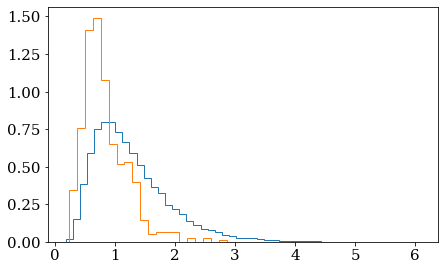

In [283]:
othercuts = "h1_cm_pt>0.25 and h2_cm_pt>0.25 and h2_p>0.35"
othercuts += " and (h1_p+h2_p)<nu and h1_z>0.5 and h2_z>0.05 and h2_z<0.45"
#othercuts += " and drap<1 and dphi< 1"

pass_ = dfs_pair['MC_D'].query("h1_pid==211 and h1_truth_pid ==211" + " and "+ othercuts)
fail =dfs_pair['MC_D'].query("h1_pid==211 and h1_truth_pid ==2212" + " and "+ othercuts)

print(len(pass_), len(fail))

#pass_ = pass_[:500]
#plt.scatter(pass_.h1_p, pass_.h1_th,3)
#plt.scatter(fail.h1_p, fail.h1_th,3)
#print(pass_.eval("e_th"))
testvars = []
#testvars.append("h1_cm_pt/sqrt(Q2)")
#testvars.append("(sqrt(h1_p**2+.938**2)+h2_p)/nu")
#testvars.append("sqrt(h1_p**2-h1_cm_pt**2)/sqrt(Q2+nu**2)")

#testvars.append("(h1_e*nu-sqrt(h1_p**2-h1_cm_pt**2)*sqrt(Q2+nu**2))/Q2")
testvars.append("h1_cm_pt/h2_cm_pt")
for var in testvars:
    
    plt.hist(pass_.eval(var), bins=50, density=True, histtype='step')
    plt.hist(fail.eval(var), bins=20, density=True, histtype='step')
    plt.show()

0.020053419256370036


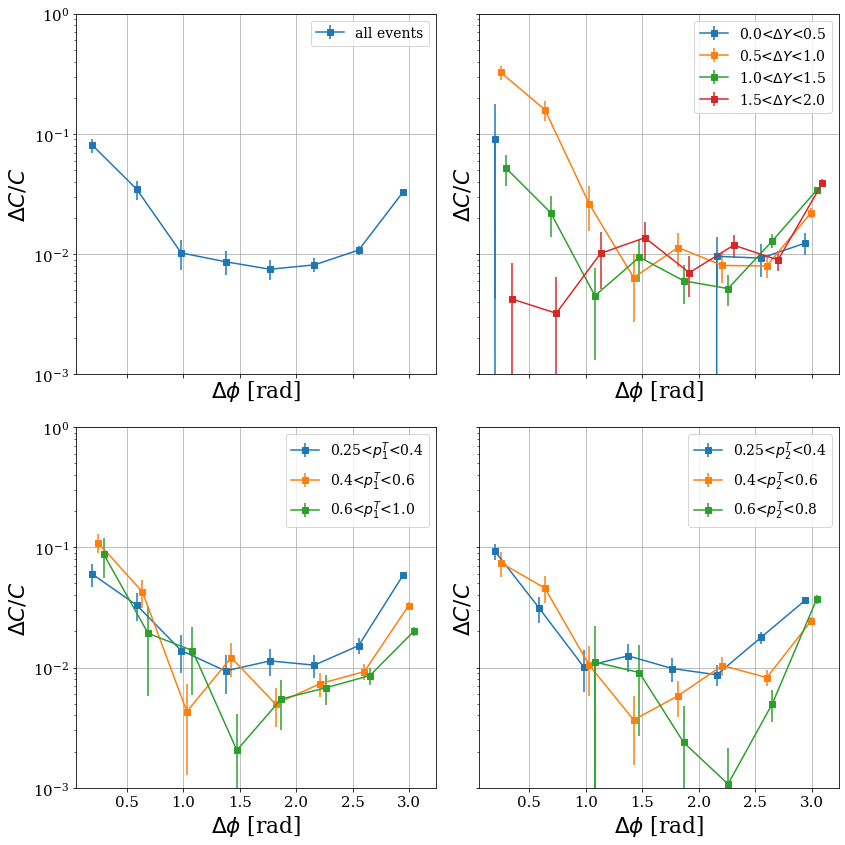

In [281]:
syst_from_misid={}
keys = "all dY pT1 pT2".split()
for A in "D".split():
    j = 0
    fig, axs=plt.subplots(2,2, figsize=(12, 12), sharex = True, sharey=True)
    df = dfs_pair[f'MC_{A}']

    othercuts = "h1_cm_pt>0.25 and h2_cm_pt>0.25 and h2_p>0.35"
    othercuts += " and (h1_p+h2_p)<nu and h1_z>0.5 and h2_z>0.05 and h2_z<0.45"
#    othercuts += " and "

    num = df.query(othercuts+" and (h1_truth_pid != 211 or h2_truth_pid != -211) and h1_pid==211 and h2_pid==-211")
    
    h1fail = df.query(othercuts+" and (h1_truth_pid != 211) and h1_pid==211 and h2_pid==-211")
    h2fail = df.query(othercuts+" and (h2_truth_pid != -211) and h1_pid==211 and h2_pid==-211")
    
    
    denom= df.query(othercuts+" and h1_pid==211 and h2_pid==-211")
    print(len(num)/len(denom))

    slice_conds= ["drap==drap"]
    for i in range(4):
        slice_conds.append(f"drap>{0.5*i} and drap<{0.5*(i+1)}")

    slice_conds.append(f"h1_cm_pt>0.25 and h1_cm_pt<0.4")
    slice_conds.append(f"h1_cm_pt>0.4 and h1_cm_pt<0.6")
    slice_conds.append(f"h1_cm_pt>0.6 and h1_cm_pt<1.0")    

    slice_conds.append(f"h2_cm_pt>0.25 and h2_cm_pt<0.4")
    slice_conds.append(f"h2_cm_pt>0.4 and h2_cm_pt<0.6")
    slice_conds.append(f"h2_cm_pt>0.6 and h2_cm_pt<0.8")    

    labels = "all events;0.0<$\Delta Y$<0.5;0.5<$\Delta Y$<1.0;1.0<$\Delta Y$<1.5;1.5<$\Delta Y$<2.0;"
    labels+= "0.25<$p^T_1$<0.4;0.4<$p^T_1$<0.6;0.6<$p^T_1$<1.0;"
    labels+= "0.25<$p^T_2$<0.4;0.4<$p^T_2$<0.6;0.6<$p^T_2$<0.8"
    labels= labels.split(";")

    shift=0
    for i, (slice_cond, label) in enumerate(zip(slice_conds, labels)):
        plt.sca(axs[j//2][j%2])
        n, x = np.histogram(num.query(slice_cond).eval("dphi"), bins=np.linspace(0, np.pi, 9))
        h1f,x = np.histogram(h1fail.query(slice_cond).eval("dphi"), bins=np.linspace(0, np.pi, 9))
        h2f,x = np.histogram(h2fail.query(slice_cond).eval("dphi"), bins=np.linspace(0, np.pi, 9))
        
        d, x = np.histogram(denom.query(slice_cond).eval("dphi"), bins=np.linspace(0, np.pi, 9))

        #n=n+0.5*(n==0)
        
        x= (x[1:]+x[:-1])/2+shift
        plt.errorbar(x, n/d, np.sqrt(n*(d-n)/d**3), label=label, marker='s')
        #plt.plot(x, h2f/d, linestyle='--')
        #print(h1f/n)
        if keys[j] not in syst_from_misid:
            syst_from_misid[keys[j]] = []
        syst_from_misid[keys[j]].append(n/d)
        if i in (0, 4, 7, 10):
            plt.xlabel("$\Delta\phi$ [rad]")
            plt.ylabel("$\Delta C/C$")
            plt.legend(fontsize=14)
            plt.yscale('log')
            plt.grid()
            plt.ylim(1e-3, 1)
            shift=0
            j+=1
        else:
            shift +=0.05
plt.tight_layout()
plt.show()

In [282]:
print(syst_from_misid)
with open("syst_from_misid.pkl", "wb") as f:
    pickle.dump(syst_from_misid, f, pickle.HIGHEST_PROTOCOL)

{'all': [array([0.08040936, 0.03455964, 0.01024429, 0.00864422, 0.00749438,
       0.00813835, 0.01081207, 0.03279669])], 'dY': [array([0.09090909, 0.        , 0.        , 0.        , 0.        ,
       0.00959693, 0.00926706, 0.01237113]), array([0.32520325, 0.15862069, 0.02608696, 0.00638298, 0.01135074,
       0.00804829, 0.00797872, 0.02213237]), array([0.05172414, 0.0221519 , 0.0045045 , 0.00944669, 0.0060015 ,
       0.00517019, 0.01290171, 0.03414634]), array([0.00423729, 0.00322581, 0.01015228, 0.01369863, 0.00700701,
       0.01187111, 0.00894929, 0.0391131 ])], 'pT1': [array([0.05965909, 0.03296703, 0.01384083, 0.00936768, 0.01135557,
       0.01047382, 0.01520784, 0.05861977]), array([0.10887097, 0.04255319, 0.00430108, 0.01212121, 0.00496586,
       0.00733945, 0.00925181, 0.03277526]), array([0.0875    , 0.01923077, 0.01382488, 0.00205339, 0.00547645,
       0.00677789, 0.00858071, 0.02019742])], 'pT2': [array([0.09268293, 0.0311284 , 0.01013025, 0.01251117, 0.00980898,
  

Starting election on dipion variables
This is Data
1.0< Q2 <4.0 222795  (100.00  %)
2.2 < nu < 4.2 222795  (100.00  %)
secondary hadrons are pions 130142  (58.41  %)
(h1_pid*h2_pid)<0, opposite charge pions 130083  (99.95  %)
kinematic limits for h2_z 129750  (99.74  %)
kinematic limits for dphi 129589  (99.88  %)
kinematic limits for pair_mass 123847  (95.57  %)
leading hadrons are pions 123847  (100.00  %)
0.2<h2_p<5.0 123619  (99.82  %)
0.2<h1_p<5.0 123619  (100.00  %)
10<h2_th 123596  (99.98  %)
Theta/P fiducial region selected for secondary hadron 116821  (94.52  %)
10< h1_th 116821  (100.00  %)
Theta/P fiducial region selected for trigger hadron 116821  (100.00  %)
Nom cuts for the pair applied (pi pi) 105618  (90.41  %)


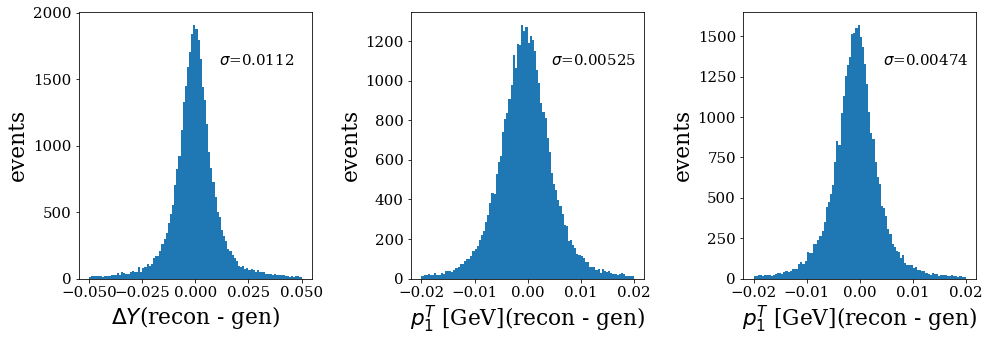

In [280]:
df = R2h_module.applyCutsPair(dfs_pair[f'MC_{A}'], nomCuts=True)

othercuts = "h1_cm_pt>0.25 and h2_cm_pt>0.25 and h2_p>0.35 and (h1_p+h2_p)<nu and h1_z>0.5  and h2_z>0.05 and h2_z<0.45"


df = df.query(othercuts+" and h1_pid==211 and h2_pid==-211")

fig,axs = plt.subplots(1,3, figsize=(14, 5))
for i,(expr,xlabel,window) in enumerate(zip(\
            ("drap-drap_truth", "h1_cm_pt-h1_truth_cm_pt", "h2_cm_pt-h2_truth_cm_pt"),
                          ("$\Delta Y$", "$p^T_1$ [GeV]", "$p^T_1$ [GeV]"),
                                       (.05, .02, .02)        
                         )):
    d=df.eval(expr)
    plt.sca(axs[i])
    plt.hist(d, bins=100, range=(-window, window))
    plt.xlabel(xlabel+ "(recon - gen)")
    plt.ylabel("events")
    sigma = np.std(d[(d>-window) & (d<window)])
    plt.text(0.6, 0.8, f"$\sigma$={sigma:.3}", transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()


# Efficiency study

In [ ]:
for A in "D C Fe Pb".split():
    df = R2h_module.applyCutsPair(dfs_pair[f'MC_{A}'], nomCuts=True)
    othercuts = "h1_cm_pt>0.25 and h2_cm_pt>0.25 and h2_p>0.35 and (h1_p+h2_p)<nu and h1_z>0.5  and h2_z>0.05 and h2_z<0.45"
    df = df.query(othercuts)
    y,x = plt.histogram(df.query("h1_"))
